### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [3]:
df = pd.read_csv('bank_data.csv')
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

In [4]:
df = pd.read_csv('bank_data.csv', skiprows = 2)   #skip_blank_lines,skipfooter,skipinitialspace
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Dropping column

In [5]:
df.drop("customerid",axis=1, inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Dividing jobedu in job and education

In [6]:
df['job'] = df.jobedu.apply(lambda x: x.split(",")[0])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [7]:
df['education'] = df.jobedu.apply(lambda x: x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


A new column 'Education' is added to the DataFrame df. The values are extracted from the 'jobedu' column using the apply() function with a lambda function that splits each 'jobedu' value by commas and retains the first part, which represents the education level. This new 'Education' column contains the extracted education levels from the 'jobedu' column.

### Dropping the jobedu

In [8]:
df.drop("jobedu",axis=1, inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Extract the value of month from the column month 

In [9]:
df[df.month.apply(lambda x: isinstance(x,float)) == True]
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


The provided code takes a DataFrame 'df' and retrieves rows where the 'month' column holds floating-point numbers. It employs a lambda function to identify instances of floats within the 'month' column, resulting in a filtered DataFram'e.'

### Missing values

In [10]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Handling missing values

In [11]:
df.age.isnull().sum()

20

In [12]:
df.shape

(45211, 19)

In [13]:
float(100.00*20/45211)

0.04423702196368141

### Drop records with age missing

In [14]:
df = df[~df.age.isnull()].copy()
df.shape

(45191, 19)

In [15]:
df.age.isnull().sum()

0

### Handling missing values in month

In [16]:
df.month.isnull().sum()

50

In [17]:
df.month.value_counts(normalize=0)

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [18]:
month_mode = df.month.mode()[0]
month_mode

'may, 2017'

In [19]:
df.month.fillna(month_mode, inplace=True)
df.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [20]:
df.month.isnull().sum()

0

In [21]:
df.month.fillna(month_mode,inplace= True)
df.month.value_counts(normalize= True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [22]:
df.month.isnull().sum()

0

### Find duplicates

In [23]:
duplicate_columns = ['age', 'response']
duplicates = df[df.duplicated(subset=duplicate_columns, keep=False)]
duplicates.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [24]:
df.age.nunique()

77

In [25]:
df.age.unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., 23., 26., 61.,
       22., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64., 69.,
       72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80., 94.,
       79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.])

In [26]:
df.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

### -1 indicates missing value!!!

### How do we hanlde this?
### Remember our objective!
* we want the missing values to be ignored in the calculations
* simply make it missing- replace -1 with NaN
* all summary statistics- mean, median, etc. will ignore the missing values

In [27]:
df.loc[df.pdays<0,"pdays"] = np.NaN
df.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Missing value doesn't have to be present as null

### Outlier Handling

### Age variable

In [28]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

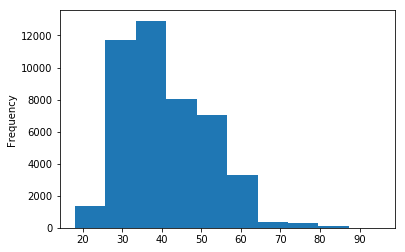

In [29]:
df.age.plot.hist()
plt.show()

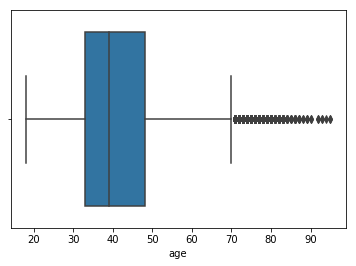

In [30]:
sns.boxplot(df.age)
plt.show()

In [31]:
df.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

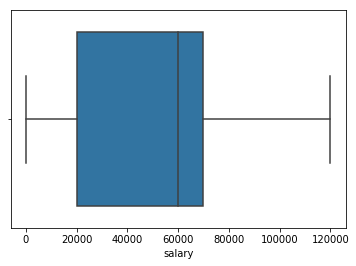

In [32]:
sns.boxplot(df.salary)
plt.show()

### Balance Variable

In [33]:
df.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

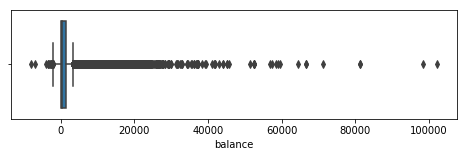

In [34]:
plt.figure(figsize=[8,2])
sns.boxplot(df.balance)
plt.show()

In [35]:
df.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [36]:
df[df.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


### Instead of looking at mean, we could look at quantiles/medians/percentiles instead

### Standarize variable

#### Duration variable

In [37]:
df.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [38]:
df.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [39]:
df.duration= df.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [40]:
df.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [41]:
df.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

## Univariate analysis- Categorical features
### Marital

In [42]:
df.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [43]:
df.marital.value_counts(normalize= True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

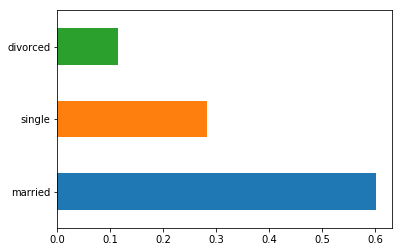

In [44]:
df.marital.value_counts(normalize= True).plot.barh()
plt.show()

In [45]:
df.job.describe()

count           45191
unique             12
top       blue-collar
freq             9727
Name: job, dtype: object

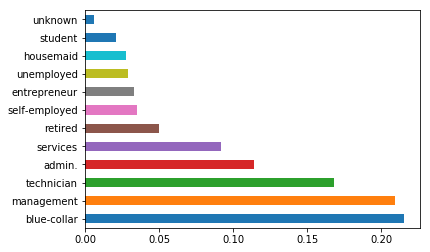

In [46]:
df.job.value_counts(normalize= True).plot.barh()
plt.show()

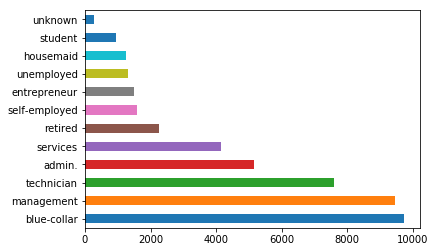

In [47]:
df.job.value_counts().plot.barh()
plt.show()


### Education variable

In [48]:
df.education.value_counts(normalize= True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

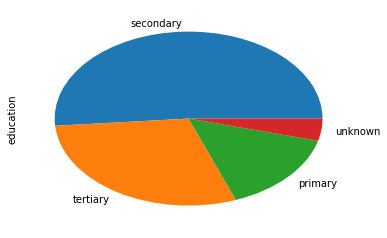

In [49]:
df.education.value_counts(normalize= True).plot.pie()
plt.show()

## poutcome variable

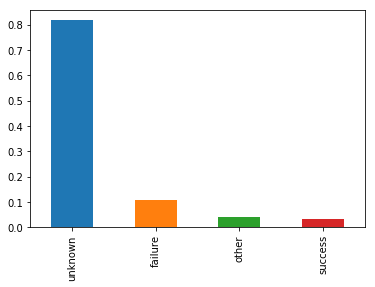

In [50]:
df.poutcome.value_counts(normalize= True).plot.bar()

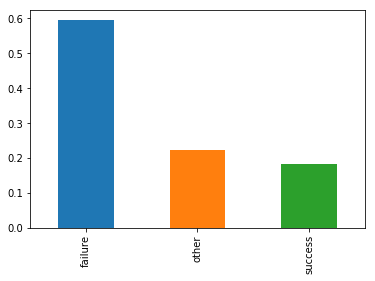

In [51]:
df[~(df.poutcome == 'unknown')].poutcome.value_counts(normalize= True).plot.bar()
plt.show()

##### response-the target vaiable

In [52]:
df.response.value_counts(normalize= True)


no     0.882974
yes    0.117026
Name: response, dtype: float64

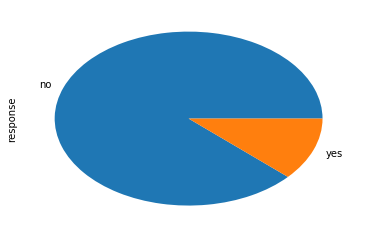

In [53]:
df.response.value_counts(normalize= True).plot.pie()
plt.show()

## Bivariate analysis

#### Numerical-numerical

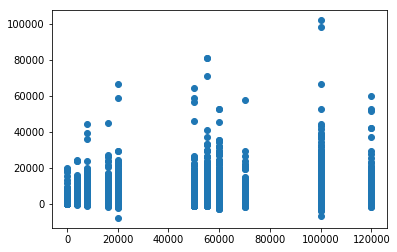

In [54]:
plt.scatter(df.salary,df.balance)
plt.show()

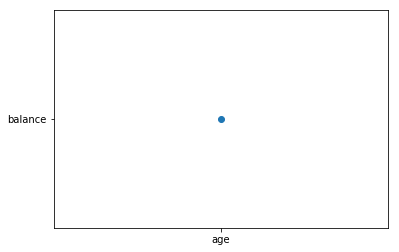

In [95]:
plt.scatter(x="age",y= "balance")
plt.show()

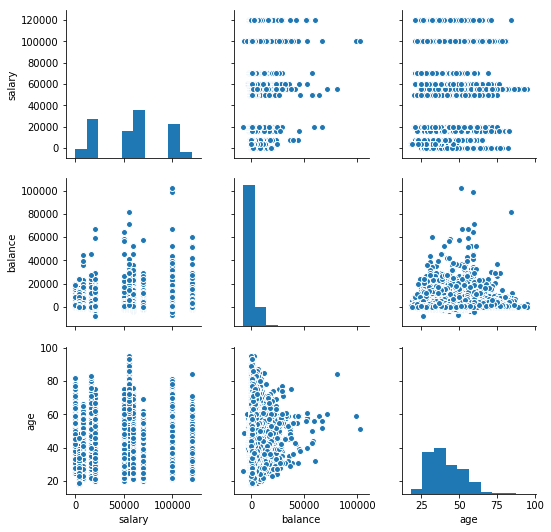

In [56]:
sns.pairplot(data=df, vars=["salary","balance","age"])
plt.show()

### Quantity using correlation values


In [57]:
df[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


## Correlation Heatmap

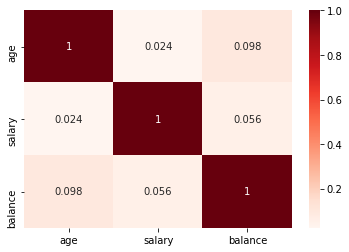

In [58]:
sns.heatmap(df[["age","salary","balance"]].corr(),annot = True, cmap="Reds")
plt.show()

### Categorical- numerical

In [59]:
df.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [60]:
df.groupby("response")['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

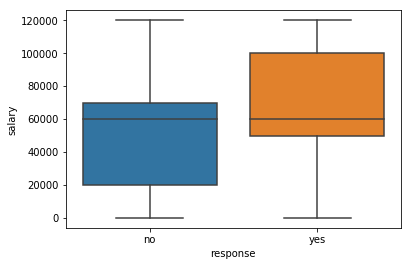

In [61]:
sns.boxplot(data= df, x="response", y="salary")
plt.show()

#### Response vs. balance
- we know that balance is highly skewed- has very high value

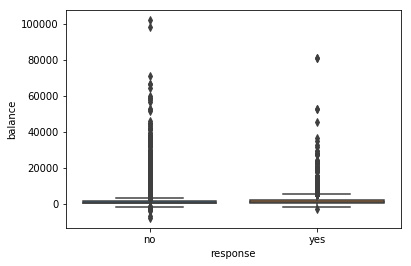

In [62]:
sns.boxplot(data = df, x="response", y = "balance")
plt.show()

In [63]:
df.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [64]:
df.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

### 75th percentile

In [65]:
import numpy as np
def p75(x):
    return  np.quantile(x,0.75)

print(p75)

<function p75 at 0x0000019F994BBD90>


In [66]:
df.groupby('response')['balance'].aggregate(["mean","median"])

,mean,median
response,,
no,1304.292281,417
yes,1804.681362,733


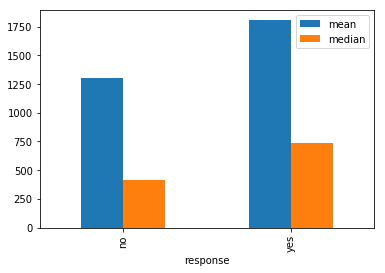

In [67]:
df.groupby('response')['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

In [68]:
df.groupby('education')['salary'].mean()

education
primary      34224.510663
secondary    49736.127280
tertiary     82878.300113
unknown      46558.427571
Name: salary, dtype: float64

In [69]:
df.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

#### Categorical- categorical

In [70]:
df['response_flag'] = np.where(df.response=='yes',1,0)

In [71]:
df.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [72]:
df.response_flag.value_counts(normalize= True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [73]:
df.response_flag.mean()

0.11694806488017526

#### Education vs. response rate

In [74]:
df.groupby(['education'])['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

### Marital vs. response rate

In [75]:
df.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

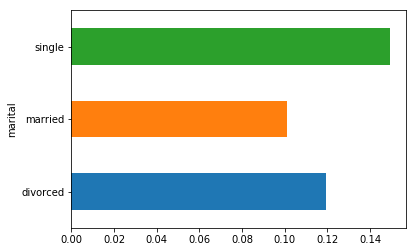

In [76]:
df.groupby(['marital'])['response_flag'].mean().plot.barh()
plt.show()

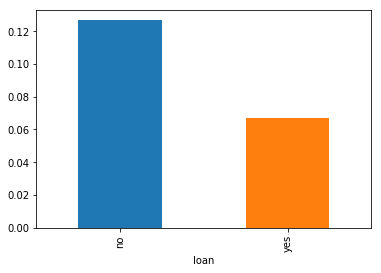

In [77]:
df.groupby(['loan'])['response_flag'].mean().plot.bar()
plt.show()

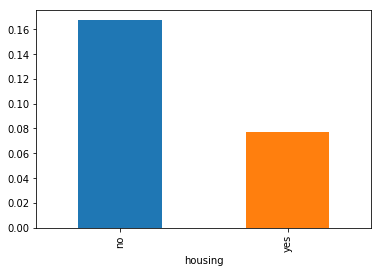

In [78]:
df.groupby(['housing'])['response_flag'].mean().plot.bar()
plt.show()

#### Age vs. response

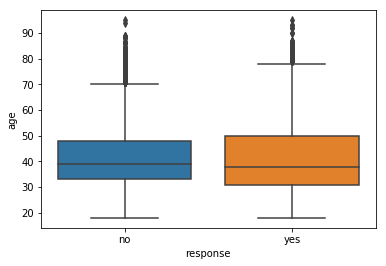

In [79]:
sns.boxplot(data= df, x="response", y="age")
plt.show()

### Making buckets from the age column

In [80]:
?pd.cut

In [81]:
pd.cut(df.age[:5],[0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): [<30 < 30-40 < 40-50 < 50-60 < 60+]

In [82]:
df.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [83]:
df['age_group']=pd.cut(df.age,[0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

In [84]:
df.age_group.value_counts(normalize= True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_group, dtype: float64

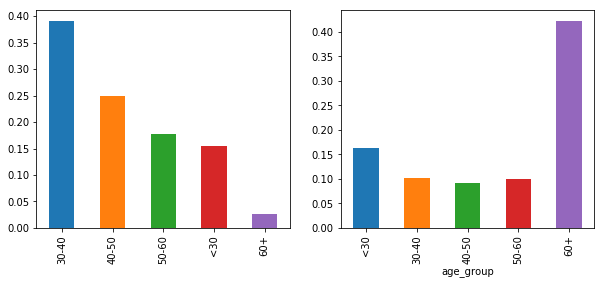

In [85]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
df.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

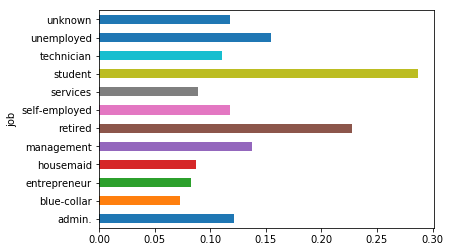

In [86]:
df.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

### More than 2 variables

In [87]:
res=pd.pivot_table(data= df,index = "education",columns="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


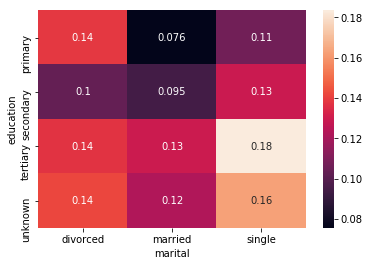

In [88]:
sns.heatmap(res, annot = True)
plt.show()

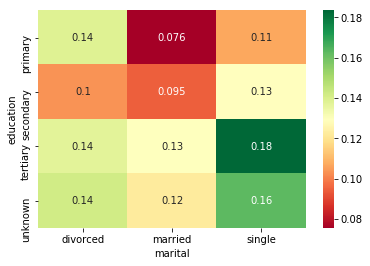

In [89]:
sns.heatmap(res, annot = True, cmap= "RdYlGn")
plt.show()

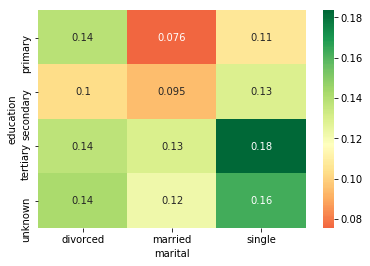

In [90]:
sns.heatmap(res, annot = True, cmap= "RdYlGn", center=0.117)
plt.show()

### Job vs. Marital vs. response

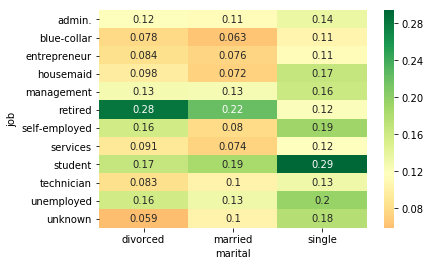

In [91]:
res=pd.pivot_table(data= df,index = "job",columns="marital", values="response_flag")
sns.heatmap(res, annot = True, cmap= "RdYlGn", center=0.117)
plt.show()

### Education vs. poutcome vs. response

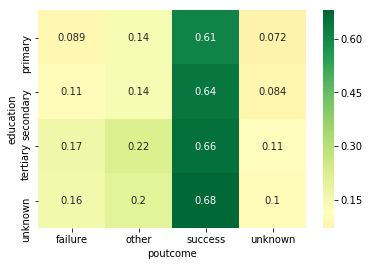

In [92]:
res=pd.pivot_table(data= df,index = "education",columns="poutcome", values="response_flag")
sns.heatmap(res, annot = True, cmap= "RdYlGn", center=0.117)
plt.show()

In [93]:
df[df.pdays>0].response_flag.mean()

0.23061076102762967

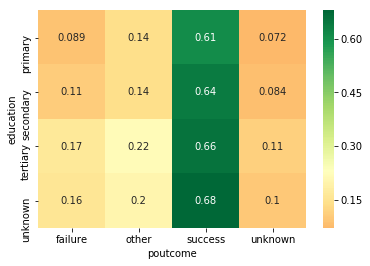

In [94]:
res=pd.pivot_table(data= df,index = "education",columns="poutcome", values="response_flag")
sns.heatmap(res, annot = True, cmap= "RdYlGn", center=0.2308)
plt.show()